## HomeWork 5
- NGUYEN NGOC THIEN PHUC
- N21DCCN066
- D21CQCNPM01-N

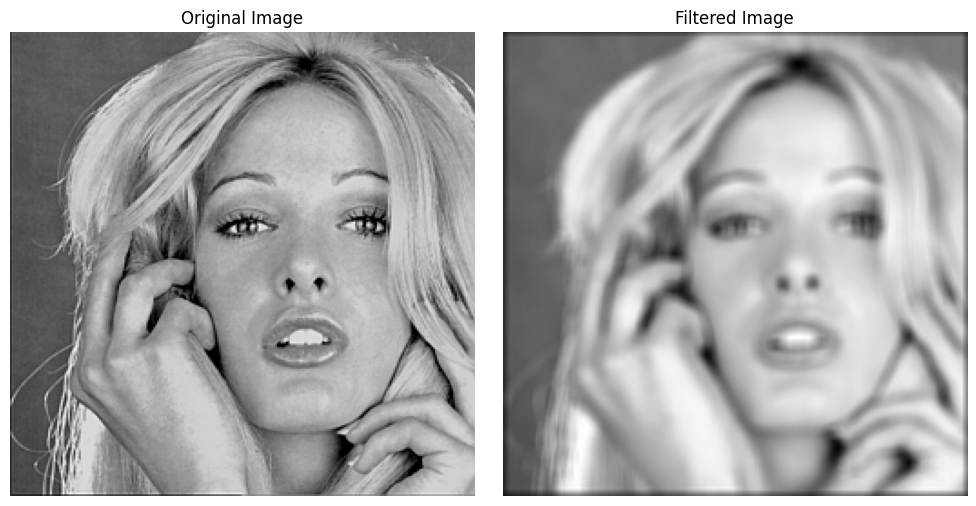

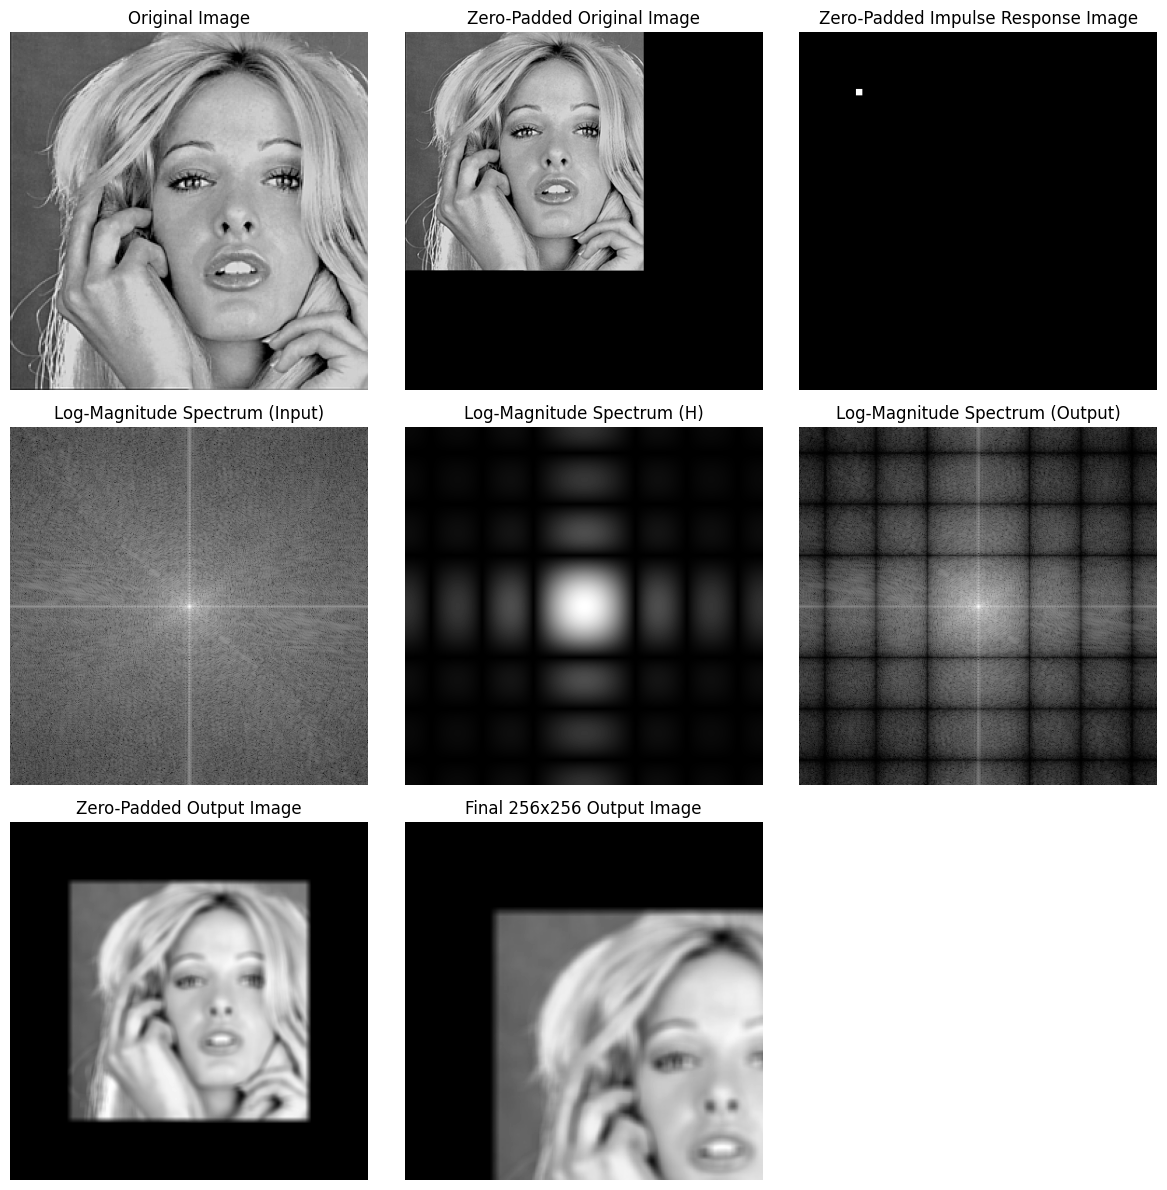

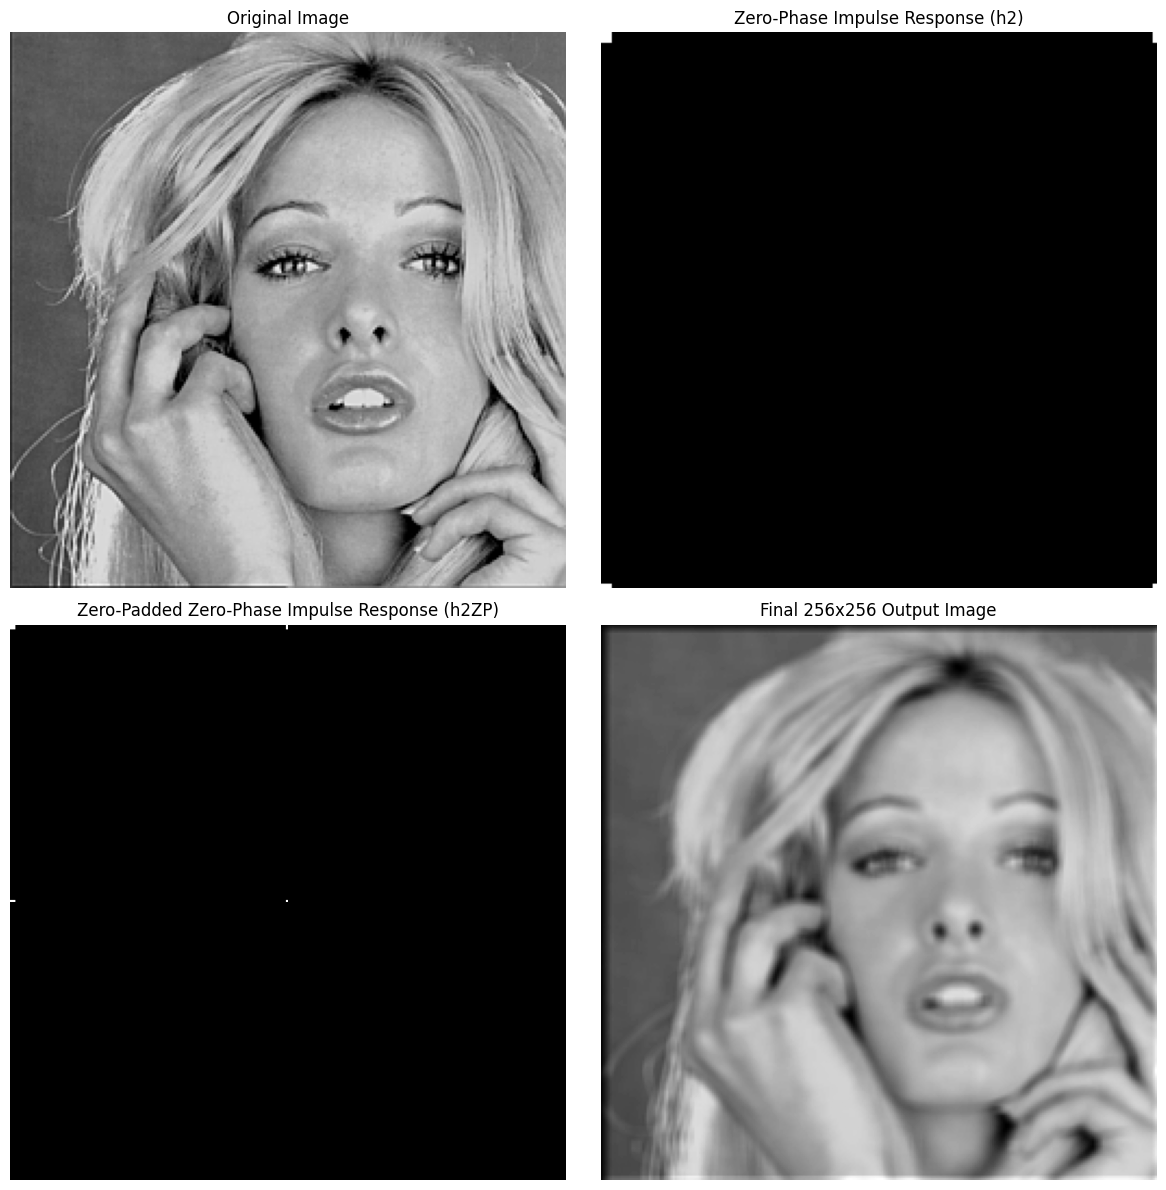

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

# Load the binary image (256x256 grayscale)
image = np.fromfile('D:/Full-Document/Information-Technology/Image-Processing/Exercises/HomeWork5/girl2bin.sec', dtype=np.uint8).reshape((256, 256))

# (a)
# Define the kernel (7x7 average filter)
kernel = np.ones((7, 7)) / 49  # Each value is 1/49

# Pad the image with zeros (3 rows/cols on each side)
padded_image = np.pad(image, pad_width=3, mode='constant', constant_values=0)

# Prepare an output array of the same size as the input image
output_image = np.zeros_like(image, dtype=np.float64)

# Perform convolution
for i in range(3, padded_image.shape[0] - 3):  # Loop over rows
    for j in range(3, padded_image.shape[1] - 3):  # Loop over columns
        # Extract the 7x7 neighborhood
        region = padded_image[i - 3:i + 4, j - 3:j + 4]
        # Apply the filter (element-wise multiplication and sum)
        output_image[i - 3, j - 3] = np.sum(region * kernel)

# Normalize the output to match the 8-bit pixel range [0, 255]
output_image = np.clip(output_image, 0, 255).astype(np.uint8)

# Display the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
cv.imwrite("D:/Full-Document/Information-Technology/Image-Processing/Exercises/HomeWork5/(5_1)Original Image.png", image)
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Filtered Image")
cv.imwrite("D:/Full-Document/Information-Technology/Image-Processing/Exercises/HomeWork5/(5_1)Filtered Image.png", output_image)
plt.imshow(output_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# (b)
# Create the impulse response image H (128x128) with a 7x7 square at the center
H = np.zeros((128, 128))
H[61:68, 61:68] = 1 / 49  # (64, 64) is the center in MATLAB indexing; adjust for Python

# Zero pad the input image and impulse response to 384x384
padded_image = np.pad(image, ((0, 128), (0, 128)), mode='constant', constant_values=0)
padded_H = np.pad(H, ((0, 256), (0, 256)), mode='constant', constant_values=0)

# Compute the DFT of the padded input image and impulse response
dft_image = np.fft.fft2(padded_image)
dft_H = np.fft.fft2(padded_H)

# Shift the DFTs to center the low frequencies
dft_image_shifted = np.fft.fftshift(dft_image)
dft_H_shifted = np.fft.fftshift(dft_H)

# Compute the log-magnitude spectra
log_dft_image = np.log(1 + np.abs(dft_image_shifted))
log_dft_H = np.log(1 + np.abs(dft_H_shifted))

# Pointwise multiplication in the frequency domain
filtered_dft = dft_image * dft_H

# Inverse DFT to obtain the filtered image
filtered_image_padded = np.real(np.fft.ifft2(filtered_dft))

# Crop the valid region to get the 256x256 output image
filtered_image = filtered_image_padded[:256, :256]

# Normalize the output to match the 8-bit pixel range [0, 255]
filtered_image = np.clip(filtered_image, 0, 255).astype(np.uint8)

# Verify with part (a)
# Assuming `Y1a` is the result from part (a)
# max_difference = np.max(np.abs(filtered_image - Y1a))
# print(f"(b): max difference from part (a): {max_difference}")

# Visualization
plt.figure(figsize=(12, 12))

# Original image
plt.subplot(3, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

# Zero-padded original image
plt.subplot(3, 3, 2)
plt.title("Zero-Padded Original Image")
cv.imwrite("D:/Full-Document/Information-Technology/Image-Processing/Exercises/HomeWork5/(5_1)Zero-Padded Original Image.png", padded_image)
plt.imshow(padded_image, cmap='gray')
plt.axis('off')

# Zero-padded impulse response image
plt.subplot(3, 3, 3)
plt.title("Zero-Padded Impulse Response Image")
cv.imwrite("D:/Full-Document/Information-Technology/Image-Processing/Exercises/HomeWork5/(5_1)Zero-Padded Impulse Response Image.png", padded_H)
plt.imshow(padded_H, cmap='gray')
plt.axis('off')

# DFT log-magnitude spectrum of input image
plt.subplot(3, 3, 4)
plt.title("Log-Magnitude Spectrum (Input)")
cv.imwrite("D:/Full-Document/Information-Technology/Image-Processing/Exercises/HomeWork5/(5_1)Log-Magnitude Spectrum (Input).png", log_dft_image)
plt.imshow(log_dft_image, cmap='gray')
plt.axis('off')

# DFT log-magnitude spectrum of impulse response
plt.subplot(3, 3, 5)
plt.title("Log-Magnitude Spectrum (H)")
cv.imwrite("D:/Full-Document/Information-Technology/Image-Processing/Exercises/HomeWork5/(5_1)Log-Magnitude Spectrum (H).png", log_dft_H)
plt.imshow(log_dft_H, cmap='gray')
plt.axis('off')

# DFT log-magnitude spectrum of output
log_filtered_dft = np.log(1 + np.abs(np.fft.fftshift(filtered_dft)))
plt.subplot(3, 3, 6)
plt.title("Log-Magnitude Spectrum (Output)")
cv.imwrite("D:/Full-Document/Information-Technology/Image-Processing/Exercises/HomeWork5/(5_1)Log-Magnitude Spectrum (Output).png", log_filtered_dft)
plt.imshow(log_filtered_dft, cmap='gray')
plt.axis('off')

# Zero-padded output image
plt.subplot(3, 3, 7)
plt.title("Zero-Padded Output Image")
cv.imwrite("D:/Full-Document/Information-Technology/Image-Processing/Exercises/HomeWork5/(5_1)Zero-Padded Output Image.png", filtered_image_padded)
plt.imshow(filtered_image_padded, cmap='gray')
plt.axis('off')

# Final cropped output image
plt.subplot(3, 3, 8)
plt.title("Final 256x256 Output Image")
cv.imwrite("D:/Full-Document/Information-Technology/Image-Processing/Exercises/HomeWork5/(5_1)Final 256x256 Output Image.png", filtered_image)

plt.imshow(filtered_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# (c)
# Create the non-zero-phase impulse response h (256x256) with a 7x7 square at the center
h = np.zeros((256, 256))
h[126:133, 126:133] = 1 / 49  # (128, 128) is the center in MATLAB indexing; adjust for Python

# Shift to zero-phase impulse response
h2 = np.fft.fftshift(h)

# Zero-pad the input image and zero-phase impulse response to 512x512
padded_image = np.pad(image, ((0, 256), (0, 256)), mode='constant', constant_values=0)
h2ZP = np.pad(h2, ((0, 256), (0, 256)), mode='constant', constant_values=0)

# Compute the DFT of the zero-padded input image and zero-phase impulse response
dft_image = np.fft.fft2(padded_image)
dft_h2ZP = np.fft.fft2(h2ZP)

# Multiply the DFTs pointwise
filtered_dft = dft_image * dft_h2ZP

# Compute the inverse DFT to obtain the filtered image
filtered_image_padded = np.real(np.fft.ifft2(filtered_dft))

# Crop the central 256x256 region to get the final output image
filtered_image = filtered_image_padded[:256, :256]

# Normalize the output to match the 8-bit pixel range [0, 255]
filtered_image = np.clip(filtered_image, 0, 255).astype(np.uint8)

# Verify with part (a)
# Assuming `Y1a` is the result from part (a)
# max_difference = np.max(np.abs(filtered_image - Y1a))
# print(f"(c): max difference from part (a): {max_difference}")

# Visualization
plt.figure(figsize=(12, 12))

# Original image
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

# Zero-phase impulse response (h2)
plt.subplot(2, 2, 2)
plt.title("Zero-Phase Impulse Response (h2)")
cv.imwrite("D:/Full-Document/Information-Technology/Image-Processing/Exercises/HomeWork5/(5_1)Zero-Phase Impulse Response (h2).png", h2)

plt.imshow(h2, cmap='gray')
plt.axis('off')

# Zero-padded zero-phase impulse response (h2ZP)
plt.subplot(2, 2, 3)
plt.title("Zero-Padded Zero-Phase Impulse Response (h2ZP)")
cv.imwrite("D:/Full-Document/Information-Technology/Image-Processing/Exercises/HomeWork5/(5_1)Zero-Padded Zero-Phase Impulse Response (h2ZP).png", h2ZP)

plt.imshow(h2ZP, cmap='gray')
plt.axis('off')

# Final filtered output image
plt.subplot(2, 2, 4)
plt.title("Final 256x256 Output Image")
cv.imwrite("D:/Full-Document/Information-Technology/Image-Processing/Exercises/HomeWork5/(5_1)Final 256x256 Output Image.png", filtered_image)

plt.imshow(filtered_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
